<a href="https://colab.research.google.com/github/varshiniboga/ADS1/blob/main/Data_Analysis_WBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
from google.colab import files


uploaded = files.upload()



Saving 3.csv to 3.csv


In [5]:
# Processing the CSV file
Dataframe = pd.read_csv('3.csv')
Dataframe.head()



,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772341
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.061110
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.324186
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600.000000


In [6]:
Cntry_filters = ['India','China','Canada','United Kingdom','United States']
indicators_filters=['GDP (current US$)','Death rate, crude (per 1,000 people)']

# Filtering the dataset for particular countries and indicators
filtered_Dataframe = Dataframe[(Dataframe['CountryName'].isin(Cntry_filters)) & (Dataframe['IndicatorName'].isin(indicators_filters))]

filtered_Dataframe

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
12071,Canada,CAN,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,7.800000e+00
12096,Canada,CAN,GDP (current US$),NY.GDP.MKTP.CD,1960,4.046172e+10
13043,China,CHN,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,2.543000e+01
13059,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,1960,5.971647e+10
20081,India,IND,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,2.218400e+01
...,...,...,...,...,...,...
1013744,United States,USA,GDP (current US$),NY.GDP.MKTP.CD,1976,1.873410e+12
1044826,Canada,CAN,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1977,7.100000e+00
1044892,Canada,CAN,GDP (current US$),NY.GDP.MKTP.CD,1977,2.116120e+11
1046885,China,CHN,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1977,6.870000e+00


In [ ]:
# Pivot table based of Country name, code, Indicator Name, and code
Dataframe_years = filtered_Dataframe.pivot_table(index=['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
                          columns='Year', values='Value').reset_index()

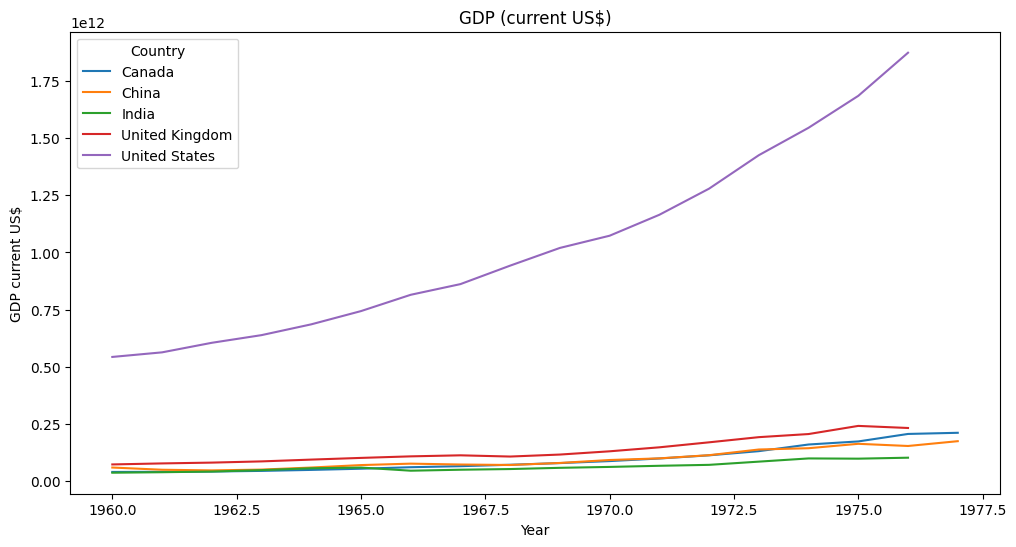

In [7]:
# Line Plot for GDP in current us$
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='CountryName', data=filtered_Dataframe[filtered_Dataframe['IndicatorName'] == 'GDP (current US$)'])
plt.title('GDP (current US$)')
plt.xlabel('Year')
plt.ylabel('GDP current US$')
plt.legend(title='Country')
plt.show()



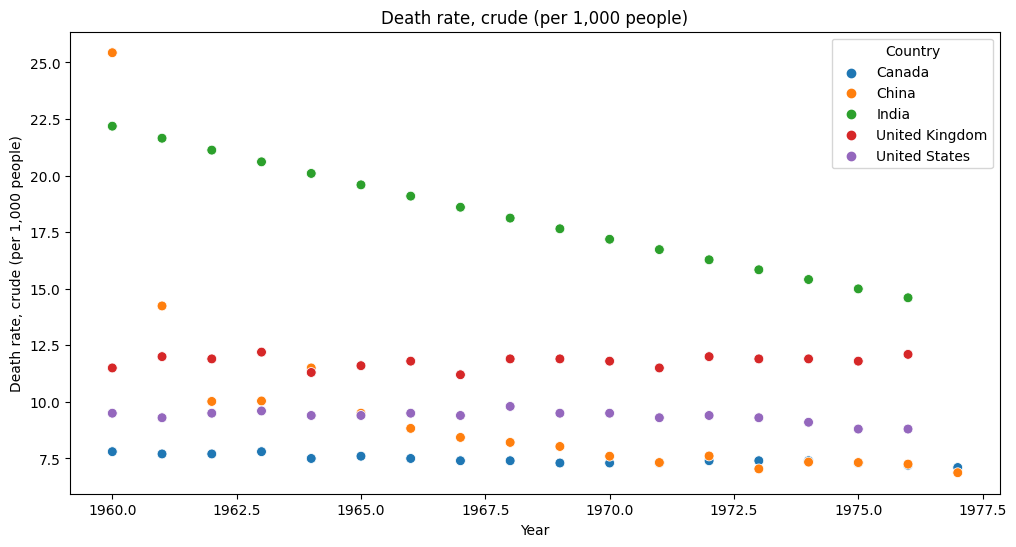

In [8]:
# Scatter Plot with Regression Line:'Death rate, crude (per 1,000 people)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Value', hue='CountryName', data=filtered_Dataframe[filtered_Dataframe['IndicatorName'] == 'Death rate, crude (per 1,000 people)'], s=50)

plt.title('Death rate, crude (per 1,000 people)')
plt.xlabel('Year')
plt.ylabel('Death rate, crude (per 1,000 people)')
plt.legend(title='Country')
plt.show()



In [15]:
filtered_Dataframe.describe()


,Year,Value
count,174.000000,1.740000e+02
mean,1968.206897,1.395351e+11
std,5.041190,3.236171e+11
min,1960.000000,6.870000e+00
25%,1964.000000,9.500000e+00
50%,1968.000000,1.851494e+10
75%,1972.750000,9.946241e+10
max,1977.000000,1.873410e+12


<Figure size 2400x1600 with 0 Axes>

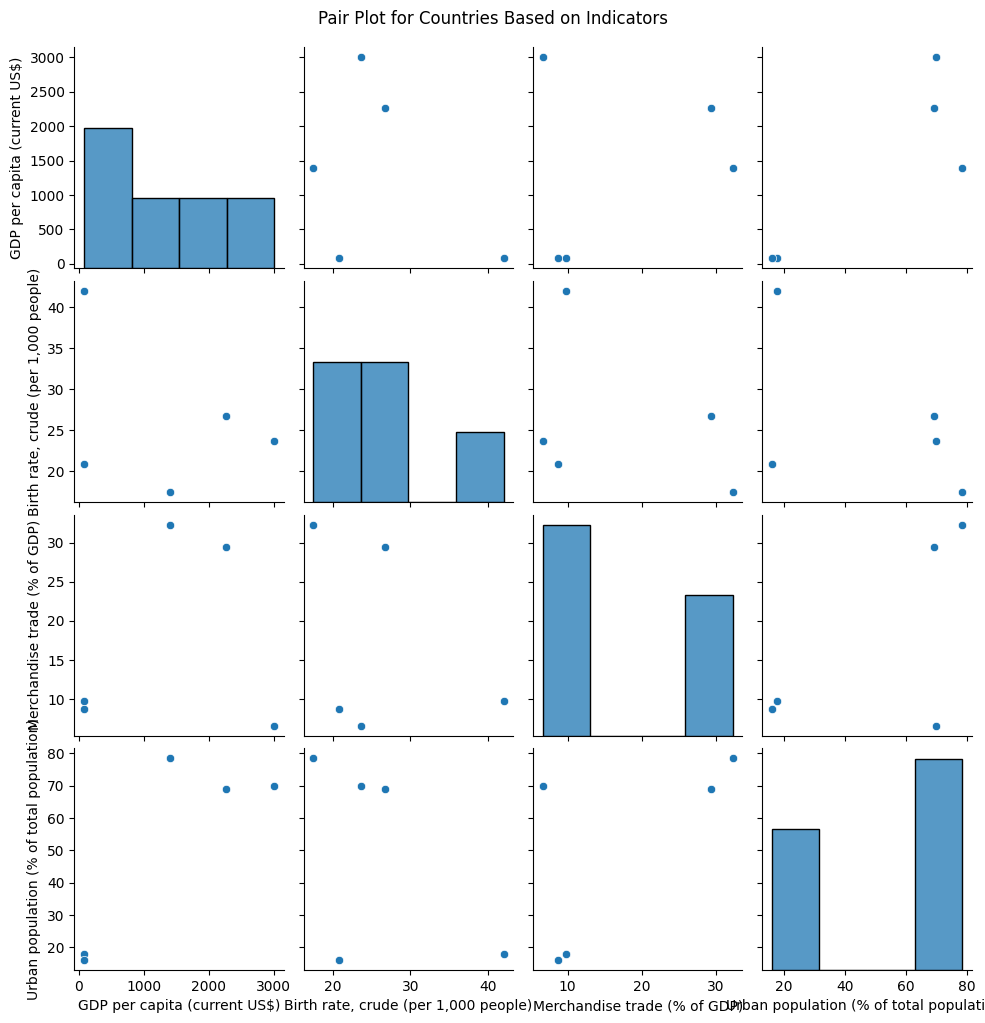

In [16]:
# Creating a pair plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'CountryName': ['India','China','Canada','United Kingdom','United States'],
    'CountryCode': ['IND', 'CHN', 'CAN', 'UK','USA'],
    'GDP per capita (current US$)': [82.18860201, 89.52054151, 2259.294285, 1397.594803, 3007.123445],
    'Birth rate, crude (per 1,000 people)': [41.995, 20.86, 26.7, 17.5, 23.7,],
    'Merchandise trade (% of GDP)': [9.816395893, 8.739632814, 29.38826996, 32.28419918, 6.625621204, ],
    'Urban population (% of total population)': [18.032, 16.203, 69.061, 78.444, 69.996,]
}

Dataframe_countries = pd.DataFrame(data)

# Selecting only numeric columns for pair plot
numeric_columns = Dataframe_countries.select_dtypes(include='number').columns

plt.figure(figsize=(24, 16))
sns.pairplot(Dataframe_countries[numeric_columns])
plt.suptitle('Pair Plot for Countries Based on Indicators', y=1.02)
plt.show()




In [17]:
# Assume 'CountryName' is a non-numeric column that you want to exclude
numeric_columns = filtered_Dataframe.select_dtypes(include='number').columns

# Calculating correlation between indicators for selected countries
correlation_matrix = filtered_Dataframe[numeric_columns].corr()

# Calculating mean and standard deviation for each indicator across selected countries
mean_values = filtered_Dataframe[numeric_columns].mean()
std_dev_values = filtered_Dataframe[numeric_columns].std()


In [18]:
filtered_Dataframe[filtered_Dataframe['CountryName']=='India']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
20081,India,IND,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,2.218400e+01
20106,India,IND,GDP (current US$),NY.GDP.MKTP.CD,1960,3.702988e+10
60124,India,IND,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1961,2.165200e+01
60150,India,IND,GDP (current US$),NY.GDP.MKTP.CD,1961,3.923244e+10
103387,India,IND,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1962,2.112600e+01
103417,India,IND,GDP (current US$),NY.GDP.MKTP.CD,1962,4.216148e+10
147589,India,IND,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1963,2.060800e+01
147620,India,IND,GDP (current US$),NY.GDP.MKTP.CD,1963,4.842192e+10
191991,India,IND,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1964,2.009600e+01
192022,India,IND,GDP (current US$),NY.GDP.MKTP.CD,1964,5.648029e+10


In [21]:
# Assume 'CountryName', 'CountryCode', 'IndicatorName', and 'IndicatorCode' are non-numeric columns
Dataframe_years = pd.read_csv('3.csv')
numeric_columns = Dataframe_years.select_dtypes(include='number').columns

# Calculating correlation matrix using only numeric columns
Dataframe_corr = Dataframe_years[numeric_columns].corr()


In [22]:
Dataframe.to_csv('final.csv')

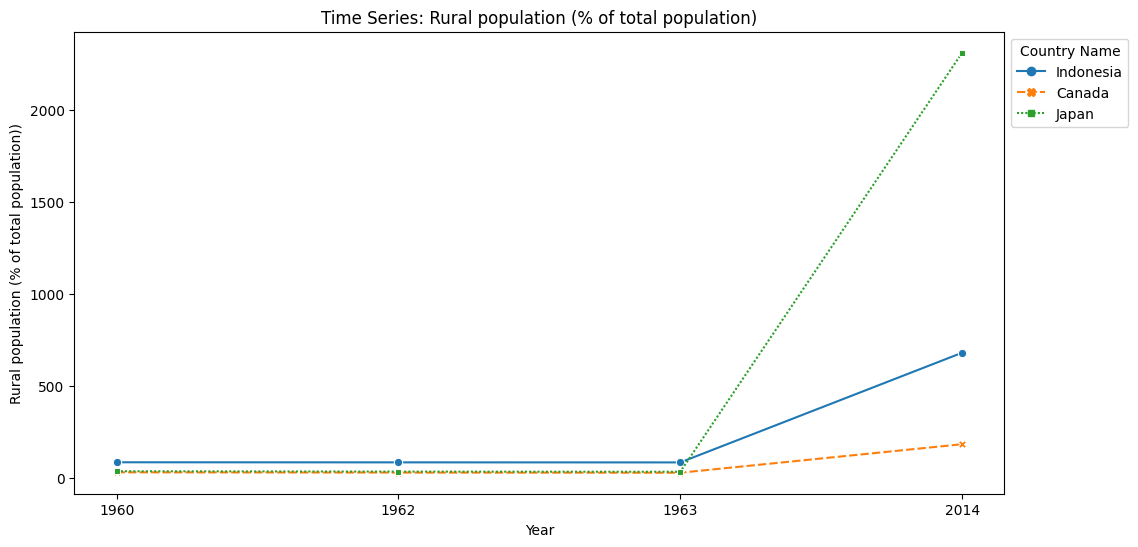

In [23]:
#data
data = {
    'Country Name': ['Indonesia', 'Canada', 'Japan'],
    '1960': [85.414, 30.939, 36.728],
    '1962': [84.942, 29.506, 34.856],
    '1963': [84.701, 28.693, 33.936],
    '2014': [680.149943, 183.440206, 2309.366503]
}

# Importing pandas module
import pandas as pd

# Importing matplotlib.pyplot module
import matplotlib.pyplot as plt

# Creating a DataFrame
Dataframe_countries = pd.DataFrame(data)

# Setting 'Country Name' column as the index
Dataframe_countries.set_index('Country Name', inplace=True)

# Transpose the dataframe for better visualization
Dataframe_countries_transposed = Dataframe_countries.transpose()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=Dataframe_countries_transposed, markers=True)
plt.title('Time Series: Rural population (% of total population)')
plt.xlabel('Year')
plt.ylabel('Rural population (% of total population))')
plt.legend(title='Country Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




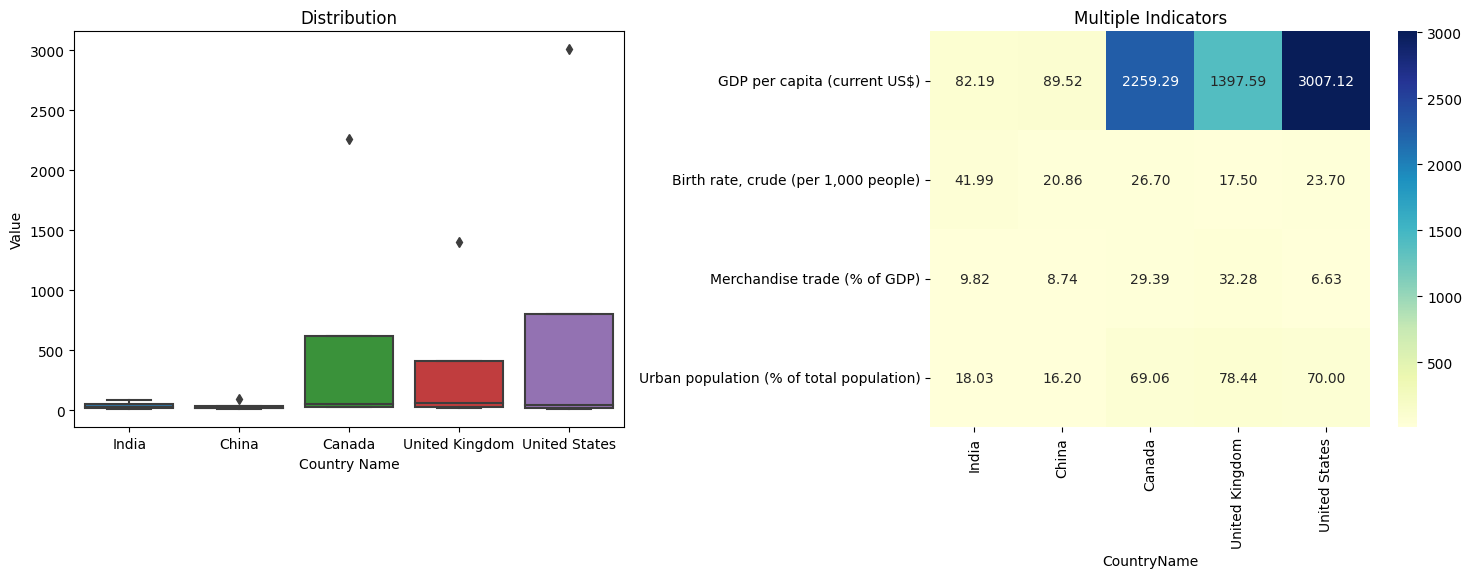

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#data
data = {
    'CountryName': ['India','China','Canada','United Kingdom','United States'],
    #'CountryCode': ['IND', 'CHN', 'CAN', 'UK','USA'],
    'GDP per capita (current US$)': [82.18860201, 89.52054151, 2259.294285, 1397.594803, 3007.123445],
    'Birth rate, crude (per 1,000 people)': [41.995, 20.86, 26.7, 17.5, 23.7,],
    'Merchandise trade (% of GDP)': [9.816395893, 8.739632814, 29.38826996, 32.28419918, 6.625621204, ],
    'Urban population (% of total population)': [18.032, 16.203, 69.061, 78.444, 69.996,]
}

#Creating DataFrame
Dataframe = pd.DataFrame(data)

#Setting 'Country Name' column as the index
Dataframe.set_index('CountryName', inplace=True)

#Transposing the dataframe for better visualization
Dataframe_transposed = Dataframe.transpose()

#Plotting different visualizations
plt.figure(figsize=(15, 10))

#Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(data=Dataframe_transposed.astype(float))
plt.title('Distribution')
plt.xlabel('Country Name')
plt.ylabel('Value')

#Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(Dataframe_transposed.astype(float), cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Multiple Indicators')
plt.tight_layout()
plt.show()


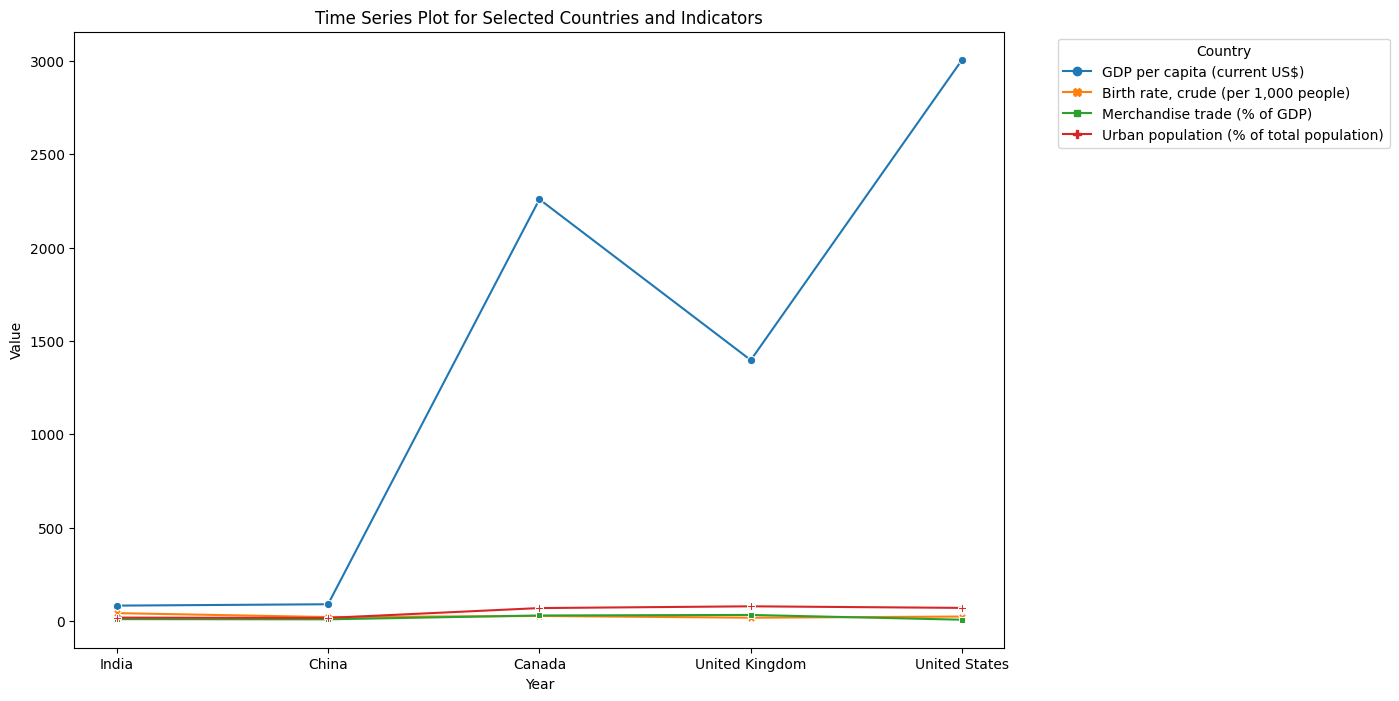

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data
data = {
    'CountryName': ['India','China','Canada','United Kingdom','United States'],
    'CountryCode': ['IND', 'CHN', 'CAN', 'UK','USA'],
    'GDP per capita (current US$)': [82.18860201, 89.52054151, 2259.294285, 1397.594803, 3007.123445],
    'Birth rate, crude (per 1,000 people)': [41.995, 20.86, 26.7, 17.5, 23.7,],
    'Merchandise trade (% of GDP)': [9.816395893, 8.739632814, 29.38826996, 32.28419918, 6.625621204, ],
    'Urban population (% of total population)': [18.032, 16.203, 69.061, 78.444, 69.996,]
}

Dataframe_countries = pd.DataFrame(data)
# Setting 'Country Name' column as the index
Dataframe_countries.set_index('CountryName', inplace=True)

# Transposing dataframe visualization
Dataframe_countries_transposed = Dataframe_countries.transpose()

# Ploting time series
plt.figure(figsize=(12, 8))
sns.lineplot(data=Dataframe_countries, markers=True, dashes=False)
plt.title('Time Series Plot for Selected Countries and Indicators')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
